## Free Fermion one particle density matrix

This code tries to calculate (3)-(13) in PRA 72, 013604(2005). The string operator is not included yet, therefore this is a pure free fermion calculation. We put <Nparticles> into <Nsites>. By calculating $P$ and $P^{\prime}$ we can get Green's function and then one particle density matrix $\rho_{ij}$.

In [1]:
using Plots
using DelimitedFiles
using LaTeXStrings
using LinearAlgebra
using Statistics
using PyPlot
pyplot()

Plots.PyPlotBackend()

### Set up the basis and Hamiltonian: a PCB non-interacting Hamiltonian

In [15]:
Nsites = 1000;                          # Actual number of physical sites is half this, we encode particle types at different sites
Nparticles = 160;                    

In [16]:
Hamiltonian=zeros((Nsites,Nsites))
for i in 1:Nsites
    Hamiltonian[i,mod(i,Nsites)+1]=-1
end
Hamiltonian[Nsites,1]=0
Hamiltonian=Hamiltonian+Transpose(Hamiltonian)
P=eigen(Hamiltonian).vectors[:,1:Nparticles];

In [17]:
function ρij(P,i,j)
    fidag=zeros(Nsites);fjdag=zeros(Nsites)
    fidag[i]=1;fjdag[j]=1
    Pi=hcat(P,fidag)
    Pj=hcat(P,fjdag)
    PP=zeros(ComplexF64,Nparticles+1,Nparticles+1);
    mul!(PP,adjoint(Pi),Pj)
    Gij=det(PP)
    ρij=-Gij
    if i==j
        ρij=1-Gij
    end
    return(ρij)
end

ρij (generic function with 1 method)

In [21]:
ρ0j=zeros(ComplexF64,Nsites);
[ρ0j[j]=ρij(P,500,j) for j in 1:Nsites];

#Since this system is periodic, we fix '0' the first site as our i and only change j. The Fourier transform is performed versus j.

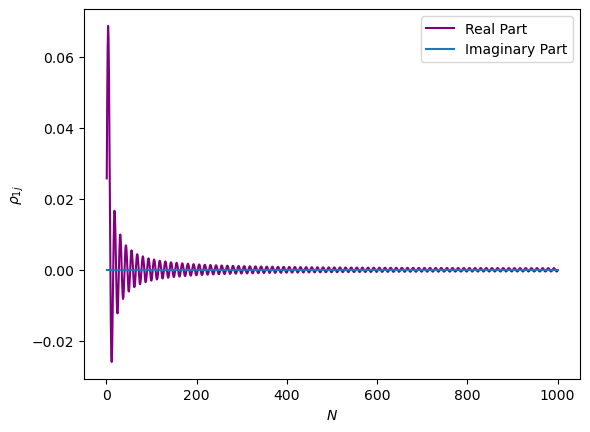

PyObject <matplotlib.legend.Legend object at 0x0000000001302A70>

In [19]:
x = 1:1:Nsites
y = real.(ρ0j)
z =imag.(ρ0j)
line1, =PyPlot.plot(x, y,label="sdsdsds",color=:purple)
line2=PyPlot.plot(x, z)
PyPlot.ylabel(L"\rho_{1j}")
PyPlot.xlabel(L"N")

legend(["Real Part", "Imaginary Part"])


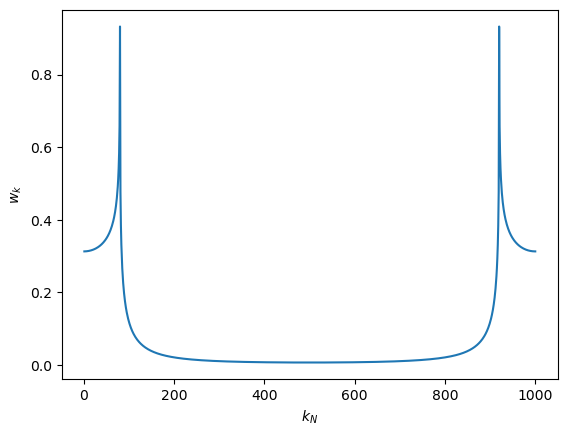

PyObject Text(0.5, 27.4, '$k_N$')

In [20]:
wk=zeros(ComplexF64,Nsites)
for ki in 1:1:Nsites
    wk[ki]=sum([exp(-1im*2*pi/Nsites*ki*n)*ρ0j[n] for n in 1:Nsites])
end

x = 1:1:1000
y = abs.(wk)

PyPlot.plot(x, y)
PyPlot.ylabel(L"w_{k}")
PyPlot.xlabel(L"k_N")

In [256]:
fermisea=filter!(x->abs(x)>1e-5,wk);
length(fermisea)

301

One could clearly see that the fermi sea formed at around 0 momentum. It would be better if we can move the right part of k space to the negative side of the axis. The number of non-zero occupation is ~300 if we initally have 300 particles.